In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('Walmart.csv')

In [3]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
df.columns


Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [8]:
df['Date'][0]

Timestamp('2010-05-02 00:00:00')

In [9]:
df['Year'] = df['Date'].apply(lambda x:x.year)
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012


In [10]:
df['Month'] = df['Date'].apply(lambda x:x.month)
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10


In [11]:
df['Day'] = df['Date'].apply(lambda x:x.day)
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,10
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19


In [12]:
df['WeekDay'] = df['Date'].apply(lambda x: x.weekday())

In [13]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,WeekDay
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,6
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,3
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,4
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,4
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28,4
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,10,3
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,10,0
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19,4


In [73]:
df = df.drop('Date',axis=1)
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,WeekDay
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,6
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,3
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,4
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,4
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,0
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28,4
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,10,3
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,10,0
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19,4


In [74]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,WeekDay
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,6
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,3
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,4
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,4
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,0
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28,4
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,10,3
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,10,0
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19,4


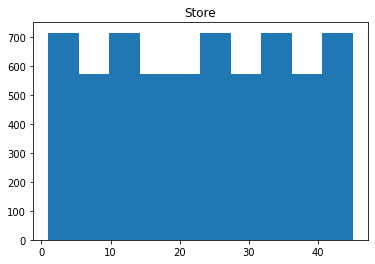

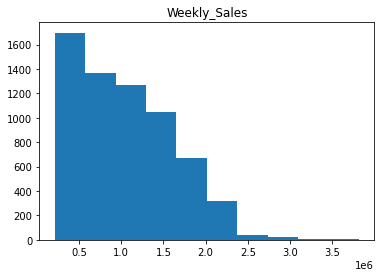

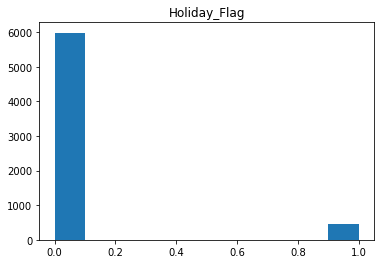

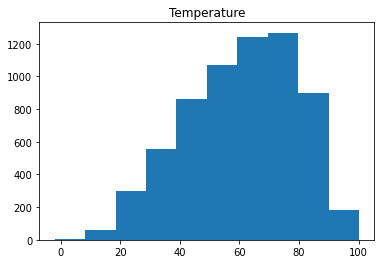

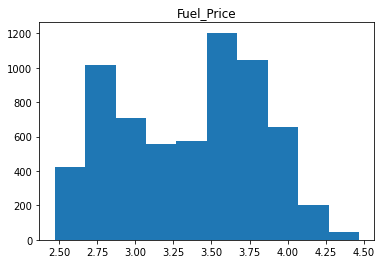

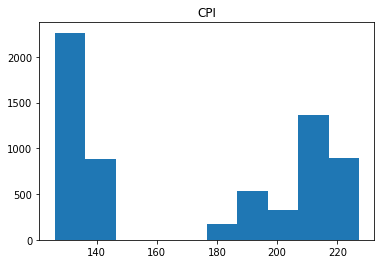

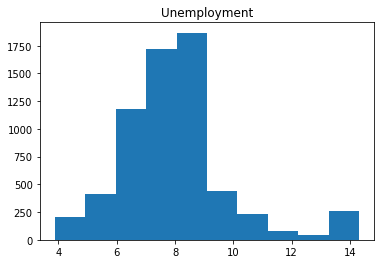

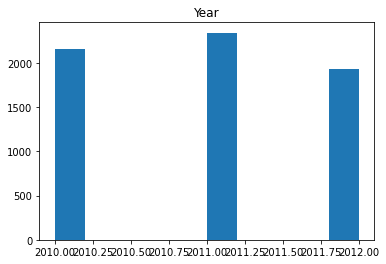

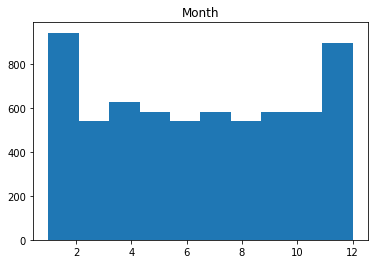

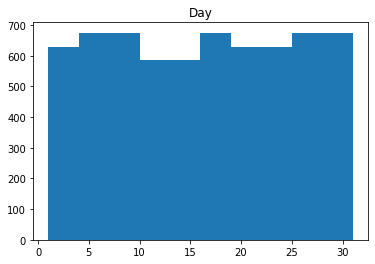

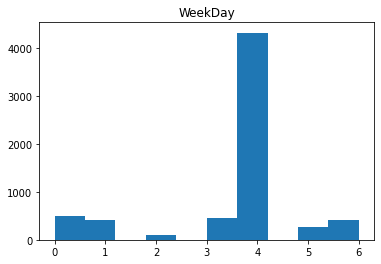

In [75]:
for i in df.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

<AxesSubplot:xlabel='Year', ylabel='Weekly_Sales'>

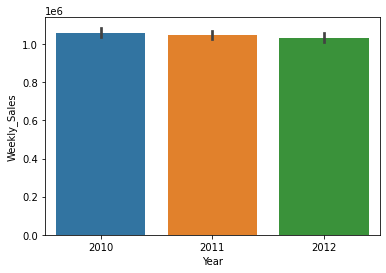

In [76]:
sns.barplot(x=df['Year'],y=df['Weekly_Sales'])

<AxesSubplot:xlabel='Month', ylabel='Weekly_Sales'>

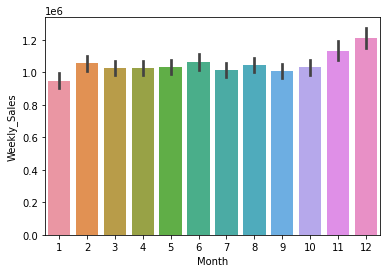

In [77]:
sns.barplot(x=df['Month'],y=df['Weekly_Sales'])

<AxesSubplot:xlabel='Day', ylabel='Weekly_Sales'>

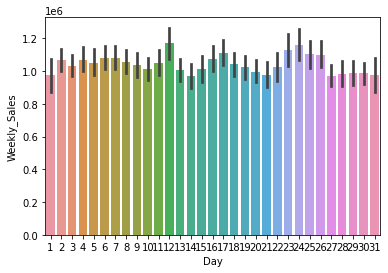

In [78]:
sns.barplot(x=df['Day'],y=df['Weekly_Sales'])

<AxesSubplot:xlabel='WeekDay', ylabel='Weekly_Sales'>

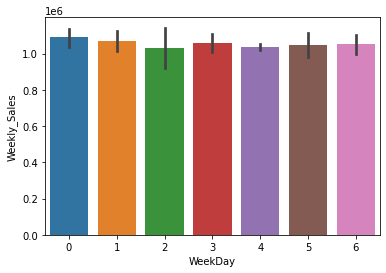

In [79]:
sns.barplot(x=df['WeekDay'],y=df['Weekly_Sales'])

In [80]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,WeekDay
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,6
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,3
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,4
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,4
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,0
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28,4
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,10,3
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,10,0
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19,4


<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

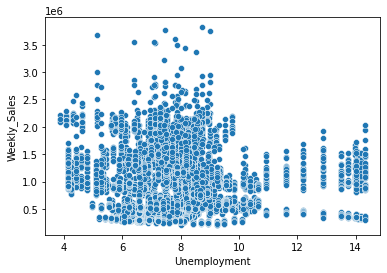

In [81]:
sns.scatterplot(x=df['Unemployment'],y=df['Weekly_Sales'])

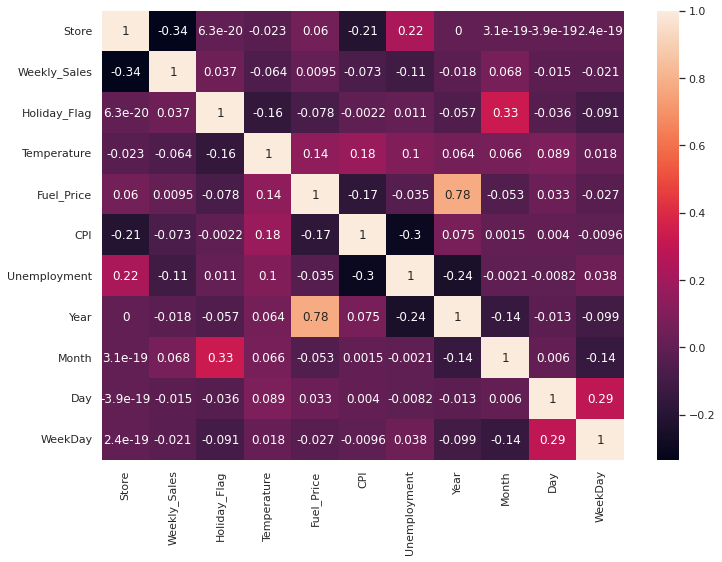

In [84]:
sns.heatmap(df.corr(),annot=True)
sns.set(rc={'figure.figsize':(20,8.27)})

<AxesSubplot:xlabel='Fuel_Price', ylabel='Year'>

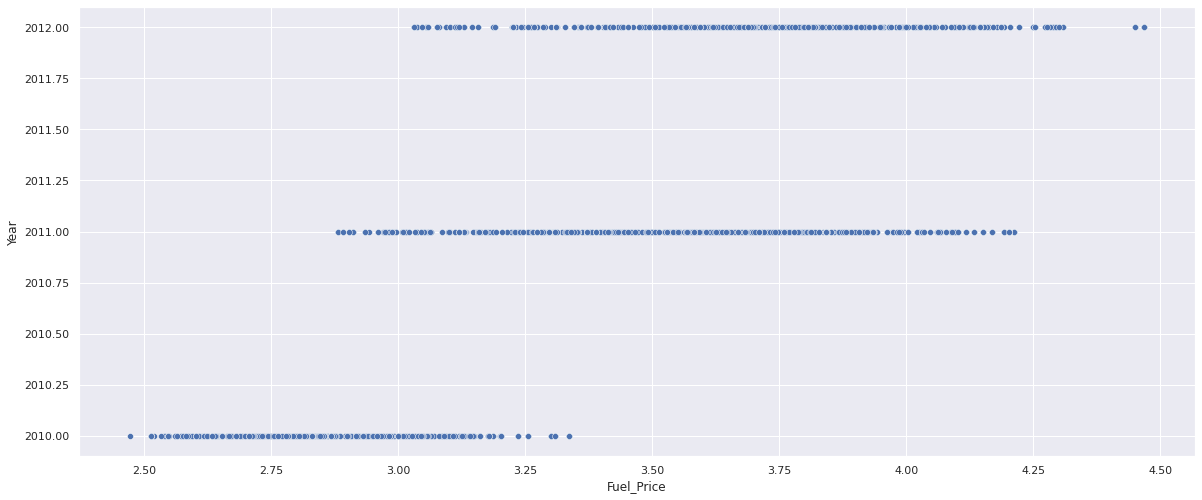

In [85]:
sns.scatterplot(x=df['Fuel_Price'],y=df['Year'])

<AxesSubplot:xlabel='Year'>

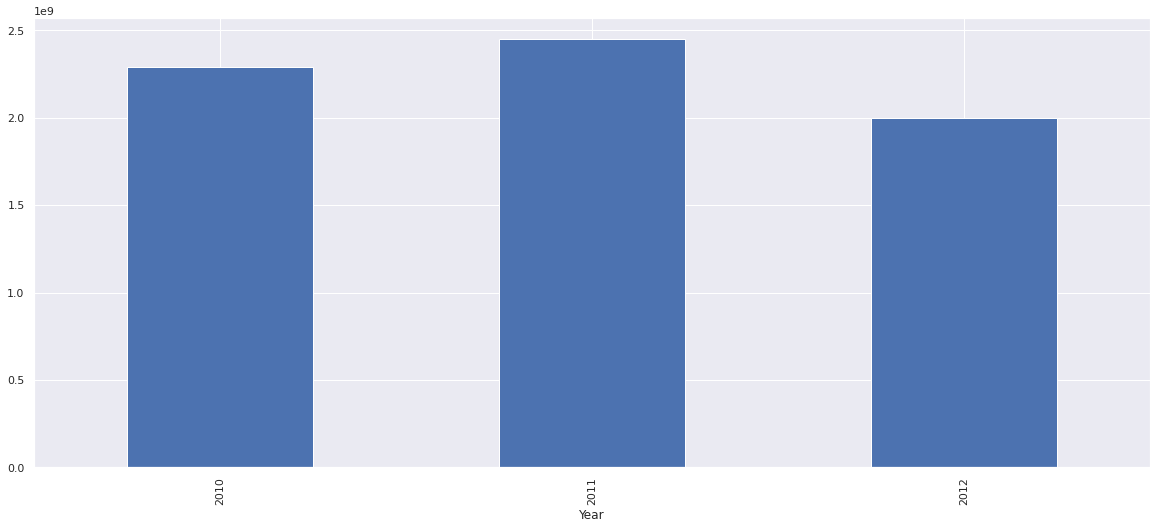

In [87]:
df.groupby('Year')['Weekly_Sales'].sum().plot.bar()

In [119]:
Y = df['Weekly_Sales']
X = df.drop(['Weekly_Sales'],axis=1)

In [124]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [125]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [126]:
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.13244971401925465

In [127]:
x_train

array([[ 0.84682589, -0.27665324, -0.07943517, ..., -0.74148802,
        -0.29345243,  0.29508674],
       [ 1.00147149, -0.27665324,  1.04787155, ..., -0.74148802,
        -1.09270053, -1.79351068],
       [-0.69963018, -0.27665324, -0.40012983, ..., -0.74148802,
         1.30504378,  0.29508674],
       ...,
       [ 0.30556626, -0.27665324, -1.27987328, ..., -1.64346825,
         1.30504378,  0.29508674],
       [ 1.38808551, -0.27665324, -1.11844252, ..., -0.74148802,
        -0.06509583,  0.29508674],
       [-1.39553542, -0.27665324, -0.50251377, ..., -1.0421481 ,
        -0.40763073,  0.29508674]])

In [128]:
model.coef_

array([-199412.54961768,    7199.31035531,  -20782.37881248,
         38229.32128614,  -84602.09702439,  -46097.62019099,
        -40052.57018615,   35559.58599293,   -4932.82609437,
         -5310.82657716])

In [129]:
model.intercept_

1041488.3083313934

In [132]:
model_tree = DecisionTreeRegressor()
model_tree.fit(x_train,y_train)
model_tree.score(x_test,y_test)

0.5208165910735723

Let's remove fuel price

In [133]:
Y = df['Weekly_Sales']
X = df.drop(['Weekly_Sales','Fuel_Price'],axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [136]:
model_tree = DecisionTreeRegressor()
model_tree.fit(x_train,y_train)
model_tree.score(x_train,y_train)
model_tree.score(x_test,y_test)

0.895528836674401

In [140]:
model_tree.get_depth()

30

In [147]:
mode_xgb = XGBRegressor(max_depth =16)
mode_xgb.fit(x_train,y_train)
mode_xgb.score(x_train,y_train)
mode_xgb.score(x_test,y_test)

0.9400311107598007